In [3]:
# Load data from sklean library
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load data and displaying summary statistics
california = fetch_california_housing()
data = pd.DataFrame(california.data, columns=california.feature_names)
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [5]:
# handling missing values
data.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

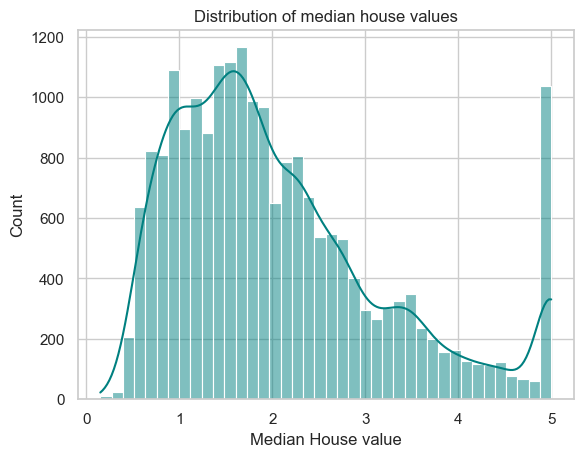

In [6]:
# visualizing key features
sns.set_theme(style="whitegrid")
data["MedHouseValue"] = california.target

# Distribution of the target variable
sns.histplot(data.MedHouseValue, bins=40, kde=True, color='teal')
plt.title('Distribution of median house values')
plt.xlabel('Median House value')
plt.show()

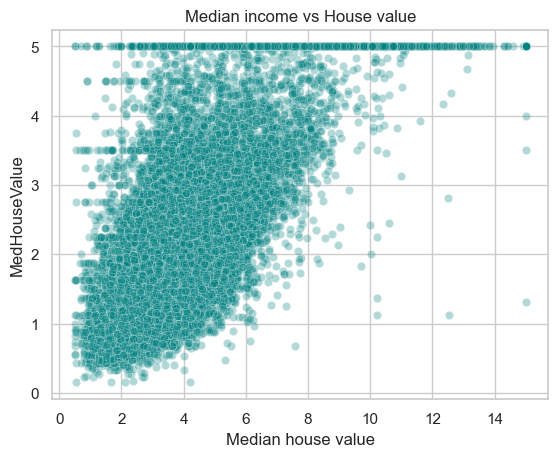

In [7]:
# Median income vs House value
sns.scatterplot(data, x="MedInc", y="MedHouseValue", alpha=0.3, color='teal')
plt.title('Median income vs House value')
plt.xlabel('Median income')
plt.xlabel('Median house value')
plt.show()

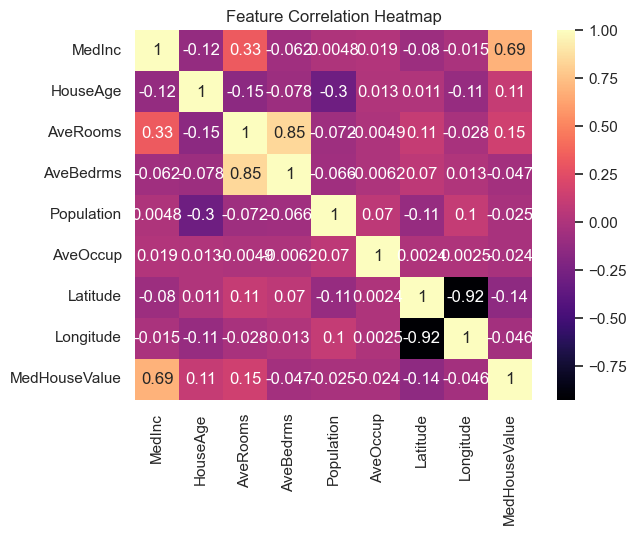

In [8]:
# Average number of rooms vs house value
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="magma")
plt.title("Feature Correlation Heatmap")
plt.show()

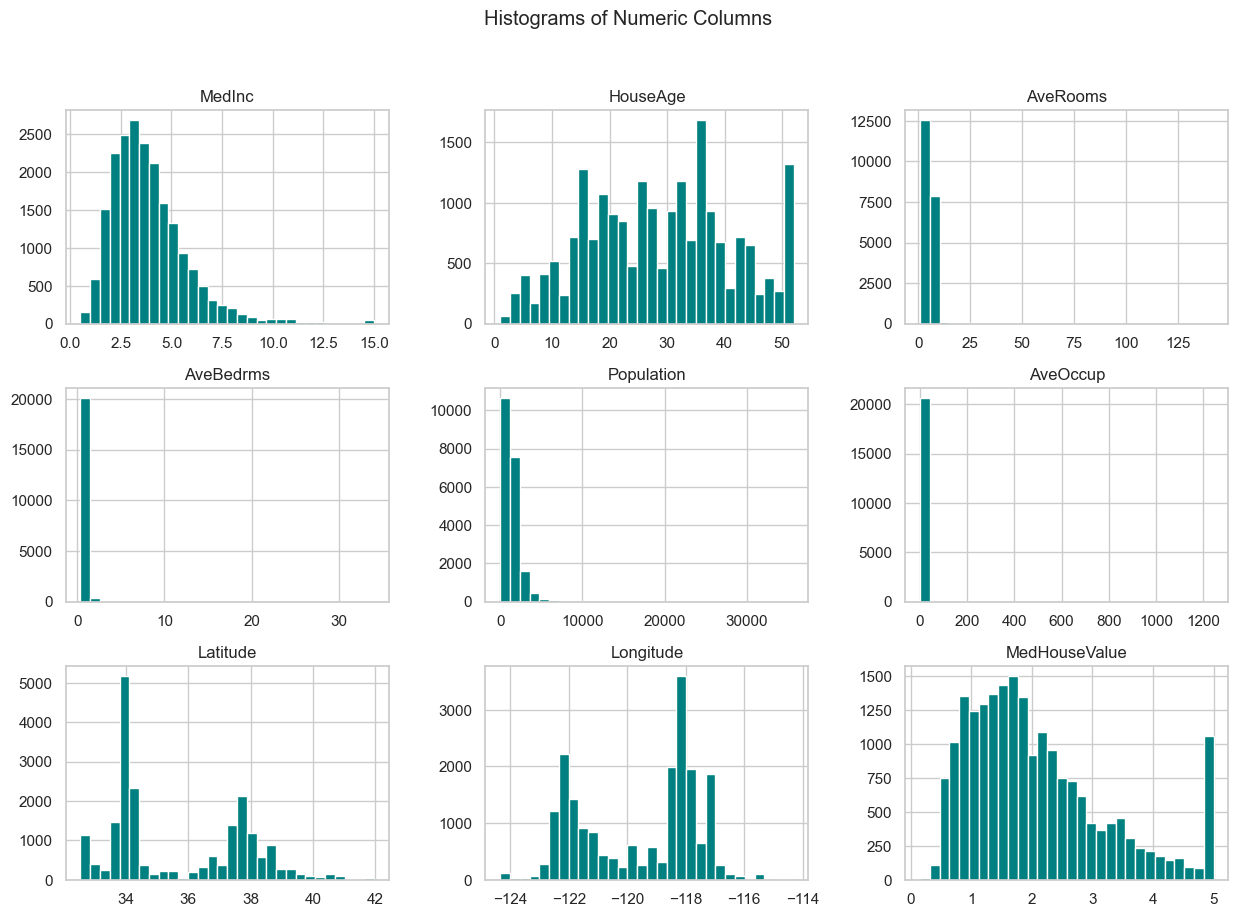

In [9]:
data.hist(bins=30, figsize=(15, 10), color='teal')
plt.suptitle("Histograms of Numeric Columns")
plt.show()


In [10]:
# detect outliers
# for column in data.columns:
#    plt.figure(figsize=(8, 4))
#    sns.boxplot(x=data[column])
#    plt.title(f"Boxplot of {column} to detect outliers") 
#    plt.show()

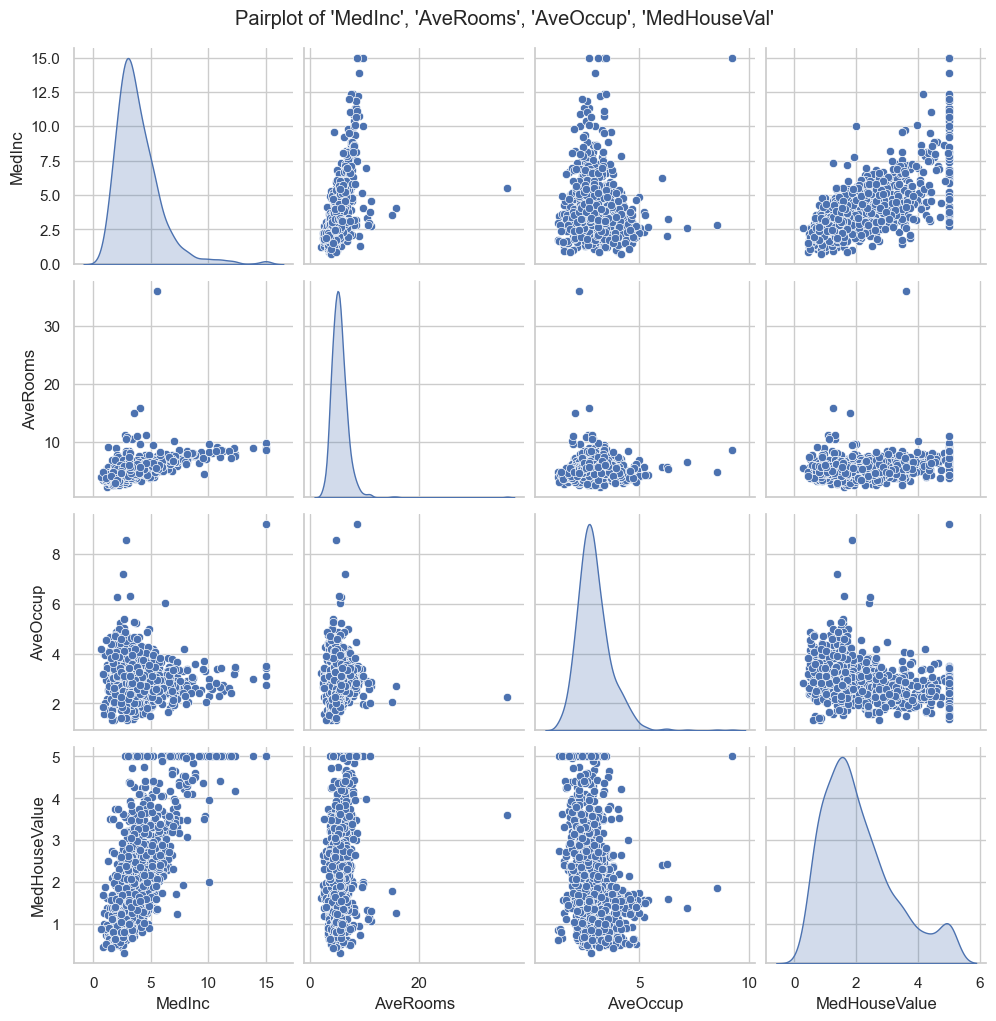

In [11]:
# Pairplot of 'MedInc', 'AveRooms', 'AveOccup', 'MedHouseVal'
sample_data = data.sample(1000, random_state=42)
sns.pairplot(sample_data[['MedInc', "AveRooms", "AveOccup", 'MedHouseValue']], diag_kind='kde')
plt.suptitle("Pairplot of 'MedInc', 'AveRooms', 'AveOccup', 'MedHouseVal'", y=1.02)
plt.show()


In [12]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression

Mean Absolute Error for LinearRegression: 0.467
R2-Score for LinearRegression: 0.646

Mean Absolute Error for DecisionTreeRegressor: 0.452
R2-Score for DecisionTreeRegressor: 0.614


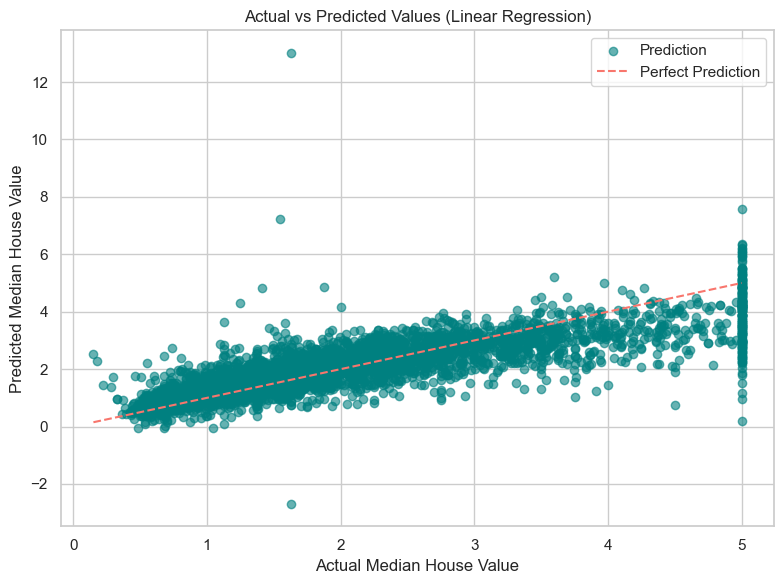

In [20]:
# Train linear regression model to predict house prices

# Define features and target
X = data.drop(columns=['MedHouseValue'])
y = data.MedHouseValue

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)


# Split the data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Make a pridiction
price_pred = model.predict(X_test)

# Evaluate the models using Mean Absolute Error (MAE) and R² Score
model_mae = mean_absolute_error(y_test, price_pred)
model_r2  = r2_score(y_test, price_pred)

print(f"Mean Absolute Error for LinearRegression: {model_mae:.3f}")
print(f"R2-Score for LinearRegression: {model_r2 :.3f}")

# Train Decision Tree Regressor 
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

# predict using Decision Tree Regressor 
tree_pred = tree_model.predict(X_test)

tree_mae = mean_absolute_error(y_test, tree_pred)
tree_r2 = r2_score(y_test, tree_pred)

print(f"\nMean Absolute Error for DecisionTreeRegressor: {tree_mae:.3f}")
print(f"R2-Score for DecisionTreeRegressor: {tree_r2 :.3f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, price_pred, alpha=0.6, color="teal", label="Prediction")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='#F8766D', linestyle='--', label="Perfect Prediction")
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted Values (Linear Regression)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
# Check correlations with the target
print(data.corr()['MedHouseValue'].sort_values(ascending=False))


MedHouseValue    1.000000
MedInc           0.688075
AveRooms         0.151948
HouseAge         0.105623
AveOccup        -0.023737
Population      -0.024650
Longitude       -0.045967
AveBedrms       -0.046701
Latitude        -0.144160
Name: MedHouseValue, dtype: float64
